## 1. (30 puntos) Optimización de funciones

Para las siguientes funciones:

\begin{equation}
f_{1}(x,y)=xe^{(-x^{2}-y^{2})}
\end{equation}


1. Grafique tal función y distinga si las funciones son convexas o no, los puntos mínimos y regiones o puntos silla.

In [97]:
import math
import torch
import sympy.core
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy import diff, symbols, parse_expr, E, sympify, latex
from torch.autograd import Variable, grad
from IPython.display import display, Markdown

In [2]:
def f(x, y):
    return x * math.e ** (-x**2 - y**2)

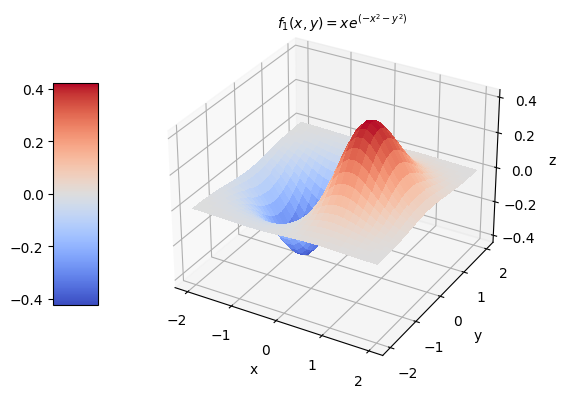

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.rcParams['legend.fontsize'] = 10
linspace_x = torch.linspace(-2, 2, steps=30)
linspace_y = torch.linspace(-2, 2, steps=30)
X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
Z = f(X, Y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.6, aspect=5, location='left')
plt.show()

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Etiam quis tristique tortor. Nunc porta egestas lacus vel eleifend. Fusce vulputate libero quis libero aliquam, non auctor elit pretium. Vestibulum faucibus, sapien at luctus eleifend, risus tellus bibendum mauris, quis ullamcorper est turpis in risus. Quisque id gravida justo. Etiam et volutpat lectus. Duis lobortis orci arcu, sit amet facilisis augue pulvinar vel. Maecenas tortor libero, gravida fringilla quam ac, euismod euismod lorem. Aenean suscipit enim ex, in efficitur quam malesuada at. Donec tempus in dui id blandit. Donec mattis lorem id nulla elementum fermentum. Sed a felis consectetur elit convallis viverra.

2. (10 puntos) Implemente el algoritmo del descenso del gradiente con moméntum:

In [4]:
def gradient_descent_momentum(initial_position, epochs=5, momentum=0.1, alpha=0.05):
    agent = initial_position
    agent.requires_grad = True
    agents = [agent]
    inertia = 0
    for epoc in range(epochs):
        function_eval = f(agent[:1], agent[1:])
        gradient = grad(function_eval, agent, create_graph=True)[0]
        agent = agent - ((momentum * inertia) + alpha * gradient)
        inertia = (momentum * inertia) + alpha * (1 - momentum) * gradient
        theta = agent.detach()
        agents.append(theta)
    agents[0] = agents[0].detach()
    return agents

In [188]:
def plot(thetas, title):
    #  Contour plot
    linspace_x = torch.linspace(-2, 2, steps=30)
    linspace_y = torch.linspace(-2, 2, steps=30)
    X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
    Z = f(X, Y)
    fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(1, 2, 1)
    cp = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(cp)  # Add a color bar to a plot
    ax.set_title(r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    thetas = torch.stack(thetas)
    agents_x = thetas[:, 0]
    agents_y = thetas[:, 1]
    ax.scatter(agents_x, agents_y, s=40, lw=0, color='yellow', label=r'HELLO')
    plt.quiver(agents_x[:-1], agents_y[:-1], agents_x[1:]-agents_x[:-1], agents_y[1:]-agents_y[:-1], scale_units='xy', angles='xy', scale=1)

    #  3D plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    agents_z = f(agents_x, agents_y)
    ax.scatter(agents_x, agents_y, agents_z, s=40, lw=0, color='yellow', alpha=1)
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, cmap=cm.coolwarm, edgecolor='none', alpha=0.7)
    ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
    ax.quiver(agents_x[:-1], agents_y[:-1], agents_z[:-1], (agents_x[1:]-agents_x[:-1]), (agents_y[1:]-agents_y[:-1]), (agents_z[1:]-agents_z[:-1]), length=1)
    plt.show()

    #  Results
    thetas_list = ""
    for theta in range(len(thetas)):
        thetas_list += "epoch " + str(theta) + ": $\\theta_{" + str(theta) + "}=" + str(round(thetas[theta][0].item(), 2)) + "," + str(round(thetas[theta][1].item(), 2)) + "$ \n"
    minimums = ""
    for minimum in range(len(agents_z)):
        minimums += "$f(\\theta_{" + str(minimum) + "})=" + str(round(agents_z[minimum].item(),2)) + "$ \n"


    plt.figure(figsize=(5.0, 1.5))

    plt.text(-0.8, 0.5, thetas_list, ha='left', va='bottom', size=20)
    plt.text(0.6, 0.5, minimums, ha='left', va='bottom', size=20)
    plt.text(0.2, 4.5, title, ha='center', va='baseline', size=20)
    plt.axis('off')
    plt.show()

a) Escoja un coeficiente de aprendizaje $\alpha$ que permita la convergencia y reporte los resultados para 10 corridas:
1) La tolerancia fijada para la convergencia en términos de la magnitud del gradiente.
2) La cantidad de iteraciones necesarias para converger.
3) El punto de convergencia.
4) Escoga una de las corridas y en una gráfica muestre los puntos probados (visitados) por el algoritmo.

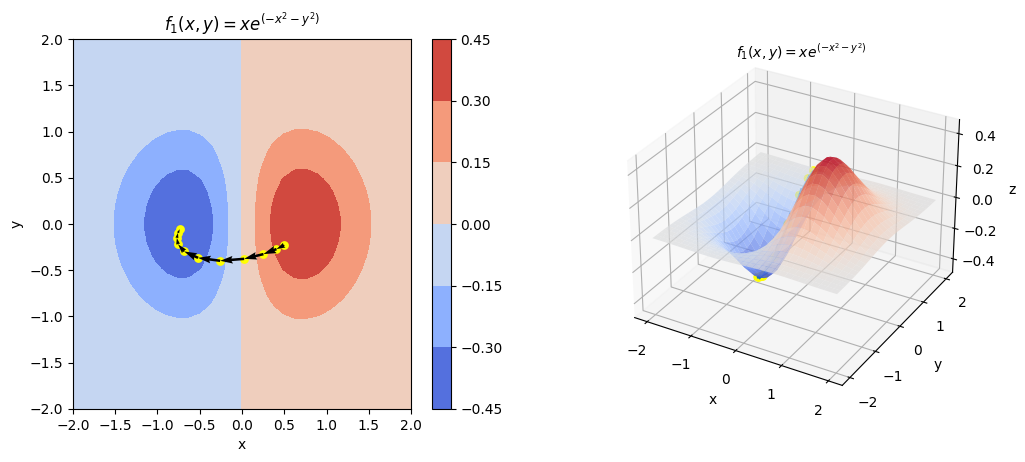

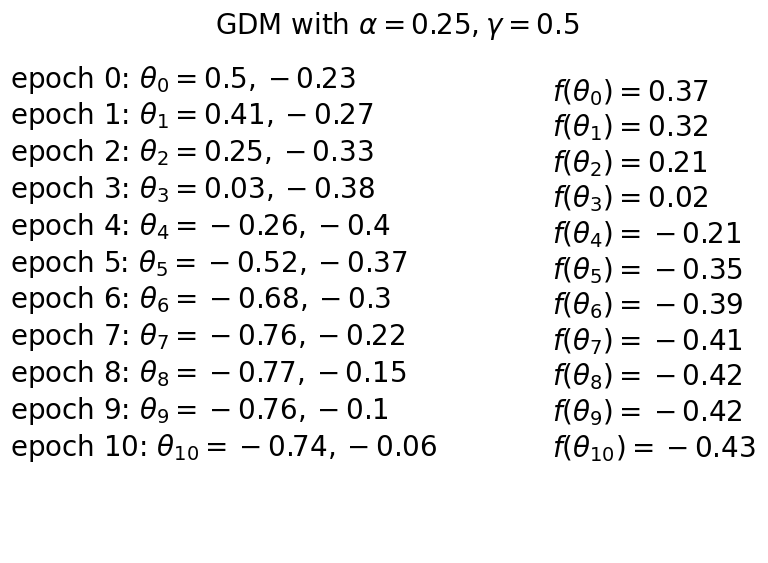

In [189]:
# TODO
# tolerancia = ?
# cantidad_iteraciones = ?
# punto_convergencia = ?
# LOOP 10 corridas, guardar resultados en una lista (los thetas), escoger uno aleatoreamente y graficarlo

# Gradient descent execution
init_position = torch.Tensor([0.5, -0.23])
thetas = gradient_descent_momentum(init_position, epochs=10, alpha=0.25, momentum=0.5)
plot(thetas, "GDM with $\\alpha=" + str(0.25) + ", \\gamma=" + str(0.5) + "$")

b) Escoja un $\alpha$ relativamente grande respecto al valor seleccionado. ¿Qué sucede? ¿Permite un $\alpha$ muy grande la convergencia?

c) ¿Qué sucede si escoge un $\alpha$ muy pequeño?

d) ¿Cómo puede el algoritmo de descenso de gradiente evitar quedar atrapado en mínimos locales o puntos silla?

In [181]:
#  Hacer el B

3. (20 puntos) Implemente el algoritmo de Newton-Raphson:

In [182]:
# Code to generate the visual representation of the hessian matrix of any function.

def visual_function(expression: str = ""):
    if not expression:
        x = symbols('x')
        y = symbols('y')
        return x * E ** (-x**2 - y**2)
    return parse_expr(expression)


def visual_hessian_matrix(expression: sympy.core.Expr, variables: list = None):
    if variables is None:
        variables = ["x", "y"]
    hess_matrix = np.empty((len(variables), len(variables)), dtype=sympy.core.Expr)
    matrix_col_row = 0
    for variable in variables:
        print("Building column #" + str(matrix_col_row + 1) + " and row #" + str(matrix_col_row + 1) + "\n")
        first_derivative = sympify(diff(expression, variable))
        print("df/d" + variable + "=" + str(first_derivative))
        variable_index = variables.index(variable)
        column = []
        for second_variable in variables[variable_index:]:
            second_derivative = sympify(diff(first_derivative, second_variable))
            print("df/d" + second_variable + "d" + variable + "=" + str(second_derivative))
            column.append(second_derivative)
        hess_matrix[matrix_col_row:, matrix_col_row] = column
        row = []
        for second_variable in variables[variable_index+1:]:
            derivative_second_var = sympify(diff(expression, second_variable))
            print("df/d" + second_variable + "=" + str(derivative_second_var))
            second_derivative = sympify(diff(derivative_second_var, variable))
            print("df/d" + variable + "d" + second_variable + "=" + str(second_derivative))
            row.append(second_derivative)
        print("\n")
        hess_matrix[matrix_col_row, matrix_col_row + 1:] = row
        matrix_col_row += 1
    return hess_matrix


def matrix_to_latex(matrix):
    latex_matrix = r'$H=\begin{pmatrix}'
    for row in matrix:
        element_latex = ""
        for element in row:
            element_latex += latex(element) + " & "
        element_latex = element_latex[:len(element_latex) - 3] + r'\\'
        latex_matrix += element_latex
    latex_matrix += r'\end{pmatrix}$'
    return latex_matrix

In [183]:
# Newton-Raphson implementation

def hessian_matrix(gradient, agent, visualize=True):
    if visualize:
        print(f"First Derivative: {gradient}")
    dimensions = agent.shape[0]
    hess_matrix = torch.zeros(dimensions, dimensions)
    for dimension in range(dimensions):
        second_derivative = grad(gradient[dimension], agent, create_graph=True)[0]
        if visualize:
            print(f"Second derivative on dimension{dimension}: {second_derivative}")
        hess_matrix[dimension:] = second_derivative
    if visualize:
        print(f"\nHessian matrix: {hess_matrix}")
    return hess_matrix


def newton_raphson(initial_position, function, epochs=5, visualize=True, damping_factor=0.4):
    agent = initial_position
    agent.requires_grad = True
    dimension = agent.shape[0]
    agents = [agent]
    latex_h_matrix = ""
    if visualize:
        h_matrix = visual_hessian_matrix(visual_function())
        latex_h_matrix = matrix_to_latex(h_matrix)
        print(f"Hessian Matrix: {h_matrix}" + "\n")
        print(f"Hessian Matrix in Latex: {latex_h_matrix}\n")
    for epoch in range(epochs):
        if visualize:
            print("---------epoch-" + str(epoch) + "-------------\n")
            print(f"Agent: {agent}\n")
        function_eval = function(agent[:1], agent[1:])
        gradient = grad(function_eval, agent, create_graph=True)[0]
        inverse_hess_matrix = torch.nan_to_num(torch.inverse(hessian_matrix(gradient, agent, visualize=visualize)))
        hess_gradient = (torch.mm(inverse_hess_matrix, gradient.view(gradient.shape[0], 1)))
        if visualize:
            print(f"Gradient: {hess_gradient}\n")
        new_agent = agent.view(agent.shape[0], 1) - damping_factor * hess_gradient
        new_agent = new_agent.view(dimension)
        if function(new_agent[:1], new_agent[1:]) > function_eval:
            agent = agent.view(agent.shape[0], 1) - damping_factor * torch.abs(hess_gradient)
        else:
            agent = new_agent
        agent = agent.view(dimension)
        theta = agent.detach()
        agents.append(theta)
        if visualize:
            print(f"New agent: {theta}\n")
    agents[0] = agents[0].detach()
    return agents, latex_h_matrix

In [191]:
init_position = torch.Tensor([0.5, 0.1])
thetas, latex_matrix = newton_raphson(init_position, f, epochs=6)

Building column #1 and row #1

df/dx=-2*x**2*exp(-x**2 - y**2) + exp(-x**2 - y**2)
df/dxdx=4*x**3*exp(-x**2 - y**2) - 6*x*exp(-x**2 - y**2)
df/dydx=4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
df/dy=-2*x*y*exp(-x**2 - y**2)
df/dxdy=4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)


Building column #2 and row #2

df/dy=-2*x*y*exp(-x**2 - y**2)
df/dydy=4*x*y**2*exp(-x**2 - y**2) - 2*x*exp(-x**2 - y**2)


Hessian Matrix: [[4*x**3*exp(-x**2 - y**2) - 6*x*exp(-x**2 - y**2)
  4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)]
 [4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
  4*x*y**2*exp(-x**2 - y**2) - 2*x*exp(-x**2 - y**2)]]

Hessian Matrix in Latex: $H=\begin{pmatrix}4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}} & 4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}\\4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}} & 4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}\\\end{pmatrix}$

---------epoch-0-------------

Agent: tensor([0.5000, 0.1000], requir

$H=\begin{pmatrix}4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}} & 4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}\\4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}} & 4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}\\\end{pmatrix}$

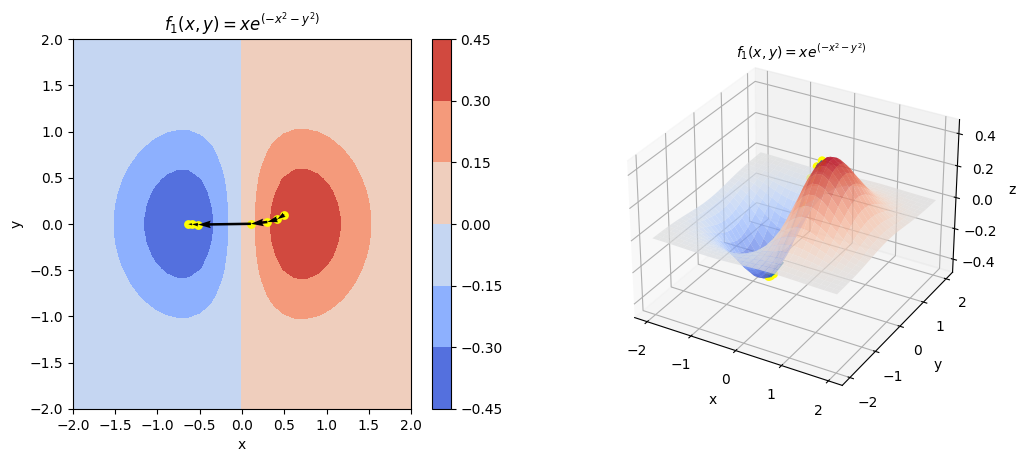

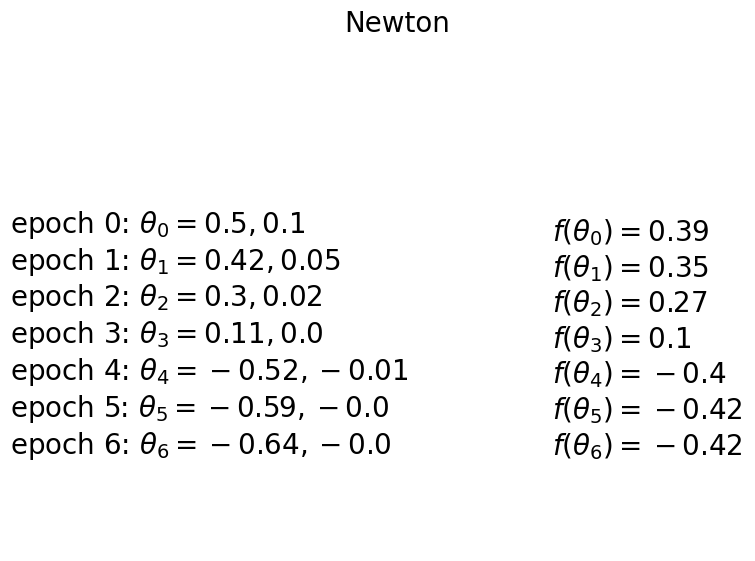

In [192]:
#  Plot Newton-Raphson
display(Markdown(latex_matrix))  # Rerun if hessian matrix not being shown !!
plot(thetas, "Newton")